In [2]:
import sys
sys.path.append("..")

from nngp import GP, DKL
from nngp.kernels import RBFKernel, MaternKernel
from nngp import utils

import numpy as np
import matplotlib.pyplot as plt

# Optionally set default precision to 'double' for stability/robustness
# import jax
# jax.config.update("jax_enable_x64", True)

## Non-stationary 1

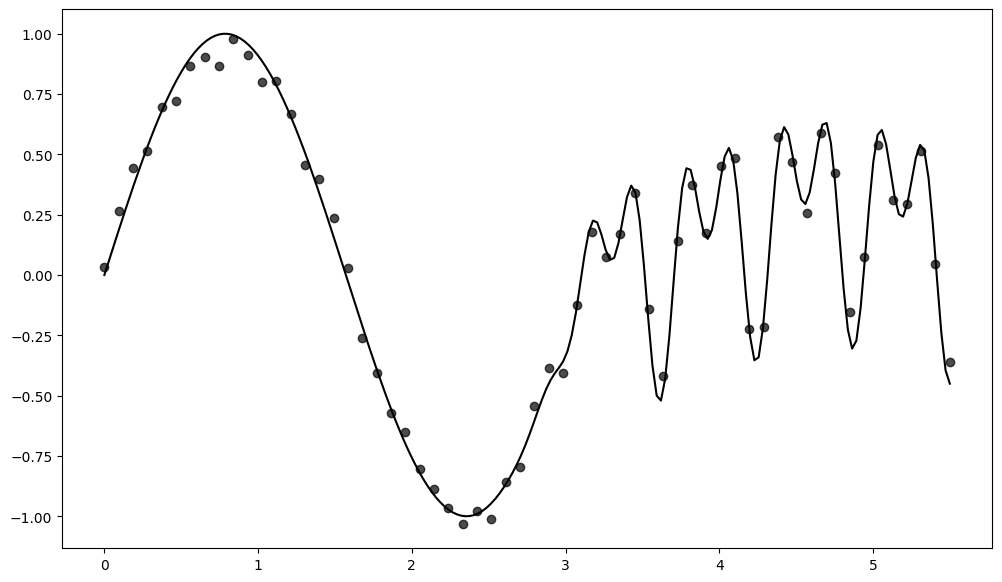

In [2]:
# Generate synthetic data
X, X_test, y, y_test = utils.nonstationary1(num_points=60, random_seed=None)

# Add small observational noise
y = np.random.normal(y, scale=0.05)

# Plot
plt.figure(figsize=(12, 7))
plt.scatter(X, y, c='k', alpha=0.7)
plt.plot(X_test, y_test, c='k')

### GP

In [29]:
# Initialize standard GP model
model = GP(1, MaternKernel)
# Train
model.fit(X, y, num_warmup=2000, num_samples=2000)
# Make a prediction on full/test inputs
posterior_mean, posterior_var = model.predict(X_test, noiseless=False)

sample: 100%|██████████| 4000/4000 [00:33<00:00, 120.29it/s, 3 steps of size 4.68e-01. acc. prob=0.89] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      0.77      0.31      0.71      0.32      1.24    711.15      1.00
    k_scale      0.65      0.51      0.49      0.13      1.19    729.73      1.00
      noise      0.05      0.01      0.04      0.03      0.07    794.71      1.00



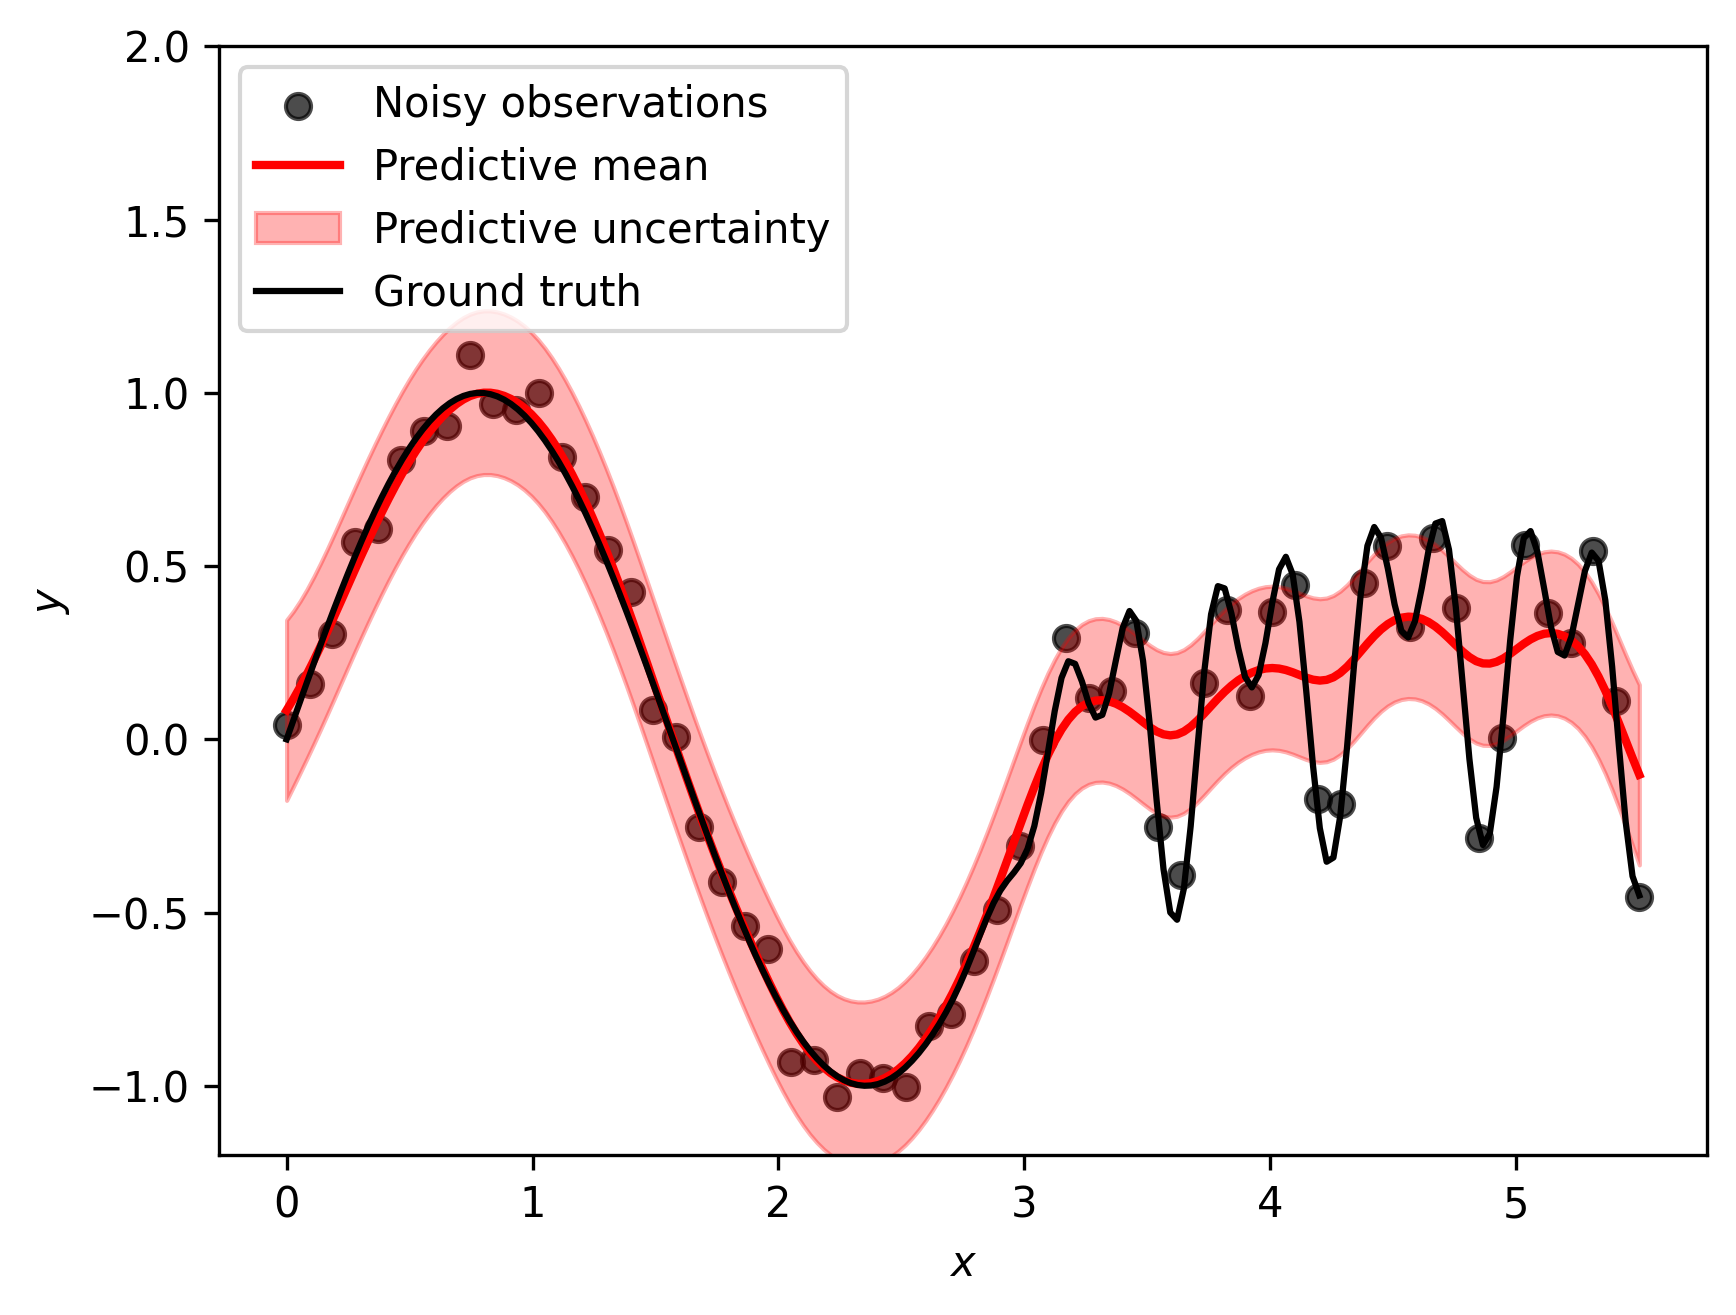

In [30]:
_, ax = plt.subplots(dpi=300)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.scatter(X, y, c='k', label="Noisy observations", alpha=0.7)
ax.plot(X_test, posterior_mean, lw=2.0,  c='r', label='Predictive mean')
ax.fill_between(X_test,
                posterior_mean - np.sqrt(posterior_var),
                posterior_mean + np.sqrt(posterior_var),
                color='r', alpha=0.3, label="Predictive uncertainty")
ax.plot(X_test, y_test, c='k', label='Ground truth')
ax.set_ylim(-1.2, 2.0)
ax.legend(loc='upper left')

### DKL

In [14]:
# Initialize DKL model with 2 latent dimensions
model = DKL(1, 2, RBFKernel)
# Train
model.fit(X, y, num_warmup=2000, num_samples=2000)
# Make prediciton on full/test data
posterior_mean, posterior_var = model.predict(X_test, noiseless=False)

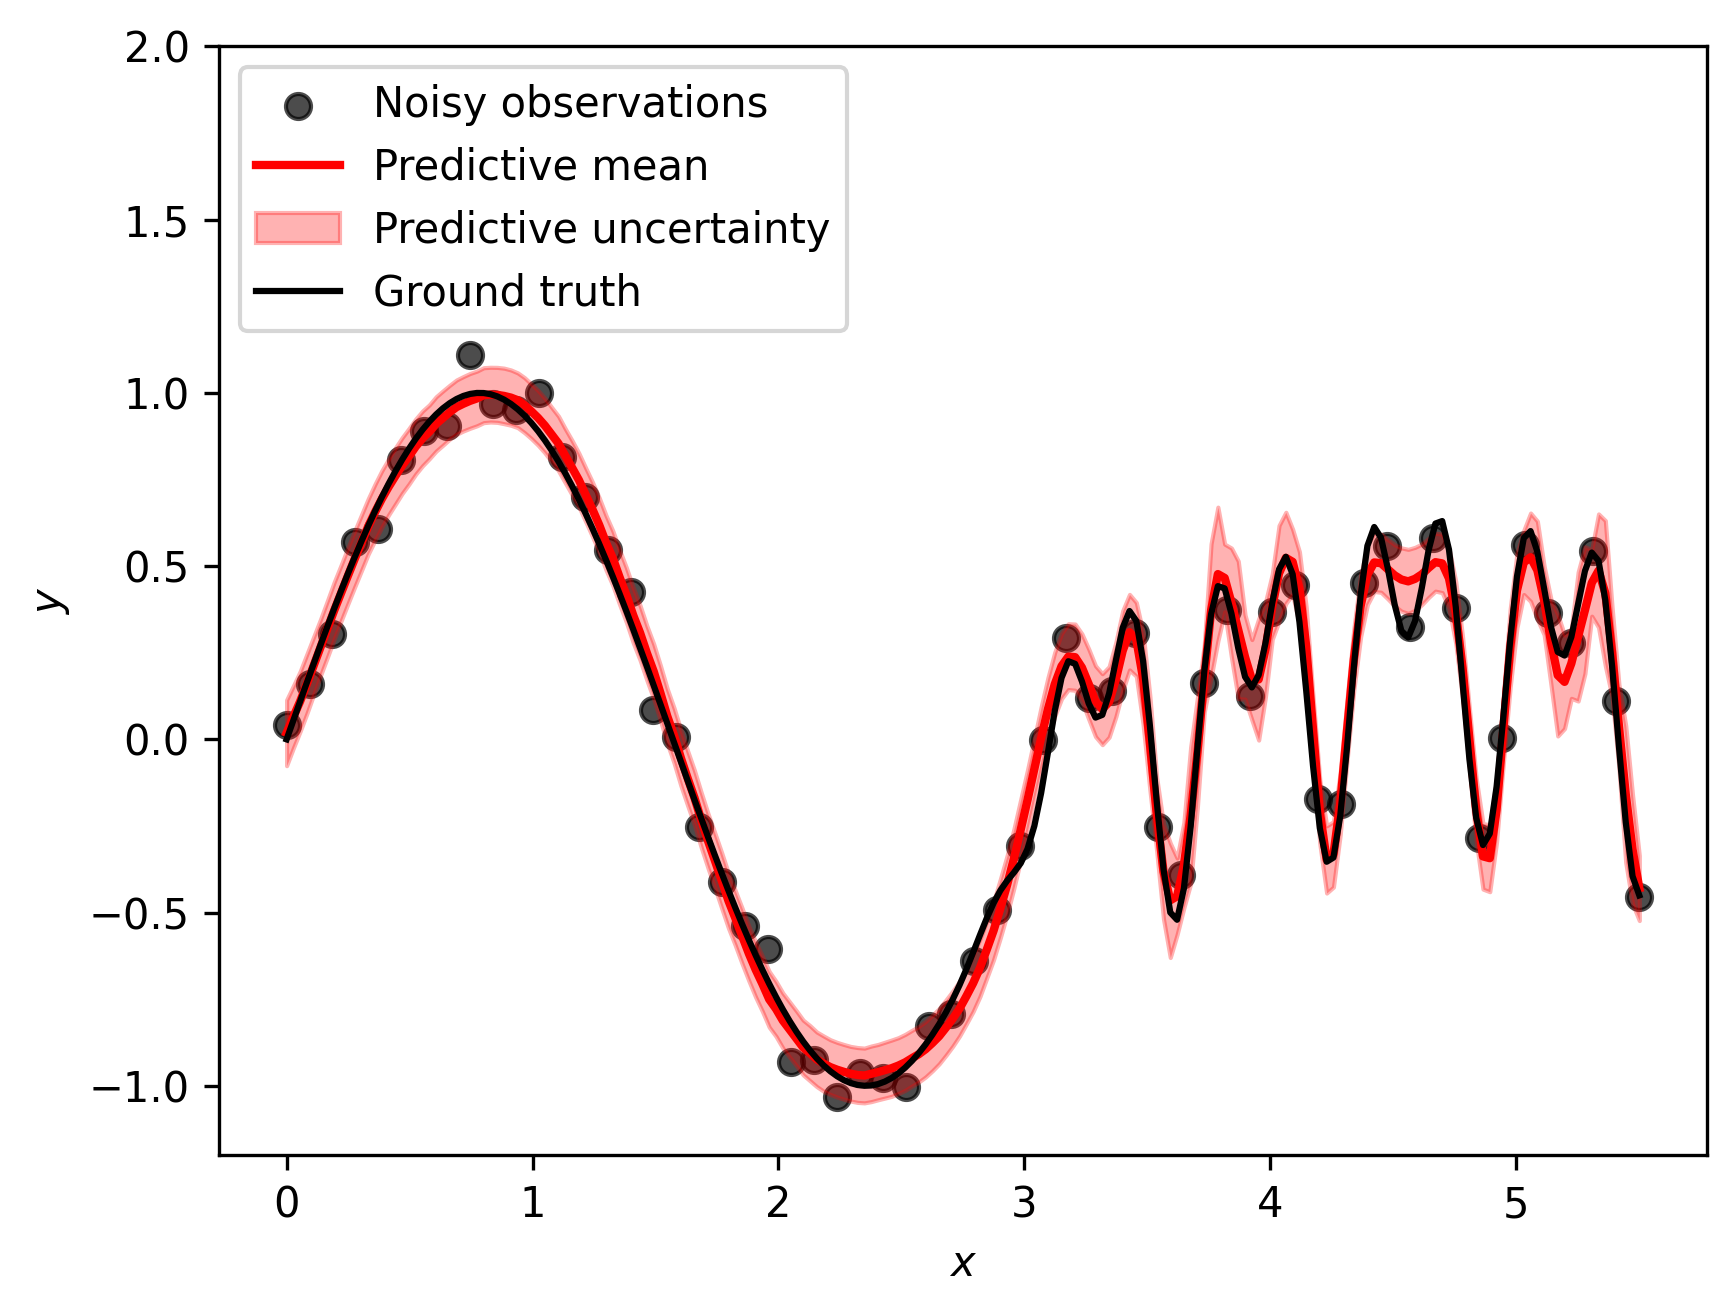

In [15]:
_, ax = plt.subplots(dpi=300)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.scatter(X, y, c='k', label="Noisy observations", alpha=0.7)
ax.plot(X_test, posterior_mean, lw=2.0,  c='r', label='Predictive mean')
ax.fill_between(X_test,
                posterior_mean - np.sqrt(posterior_var),
                posterior_mean + np.sqrt(posterior_var),
                color='r', alpha=0.3, label="Predictive uncertainty")
ax.plot(X_test, y_test, c='k', label='Ground truth')
ax.set_ylim(-1.2, 2.0)
ax.legend(loc='upper left')

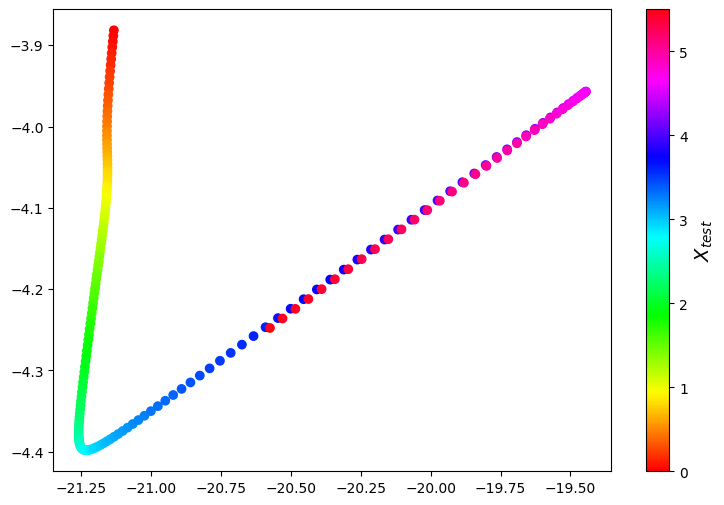

In [28]:
# Embed input data into the latent space of the trained DKL model
z_samples = model.embed(X_test[:, None])
# Avarage over the HMC samples
z_mean = z_samples.mean(0)

# Plot the embedding
plt.figure(figsize=(9, 6))
plt.scatter(z_mean[:, 1], z_mean[:, 0], c=X_test, cmap='hsv')
cbar = plt.colorbar()
cbar.set_label('$X_{test}$', fontsize=14)

## Non-stationary 2

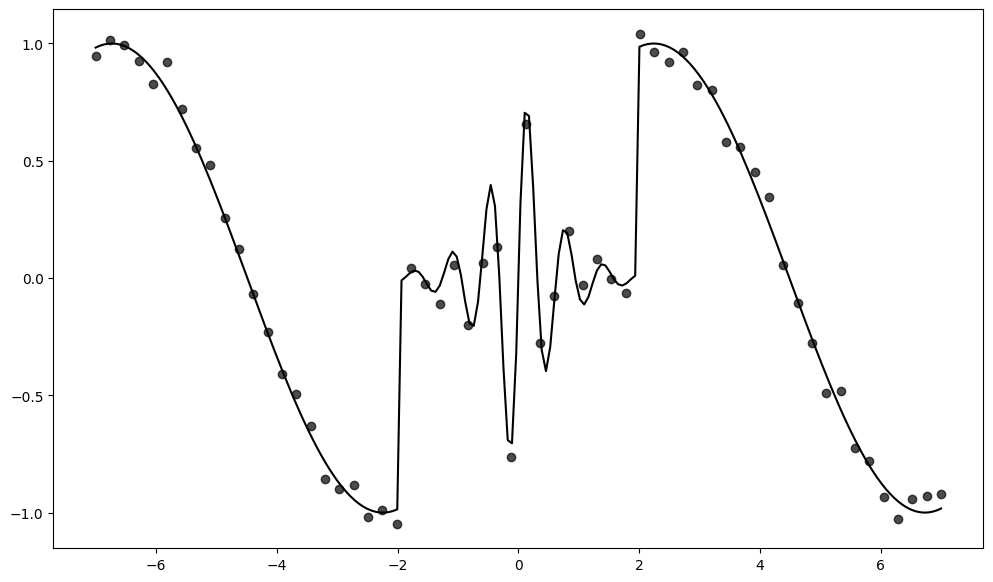

In [4]:
# Generate synthetic data
X, X_test, y, y_test = utils.nonstationary2(num_points=60, random_seed=None)

# Add small observational noise
y = np.random.normal(y, scale=0.05)

# Plot
plt.figure(figsize=(12, 7))
plt.scatter(X, y, c='k', alpha=0.7)
plt.plot(X_test, y_test, c='k')

### GP

In [5]:
# Initialize standard GP model
model = GP(1, MaternKernel)
# Train
model.fit(X, y, num_warmup=2000, num_samples=2000)
# Make a prediction on full/test inputs
posterior_mean, posterior_var = model.predict(X_test, noiseless=False)

sample: 100%|██████████| 4000/4000 [00:34<00:00, 114.94it/s, 3 steps of size 4.26e-01. acc. prob=0.95] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      2.07      0.56      2.01      1.17      2.91    940.35      1.00
    k_scale      0.79      0.57      0.63      0.19      1.43    803.84      1.00
      noise      0.06      0.01      0.06      0.04      0.08   1028.00      1.00



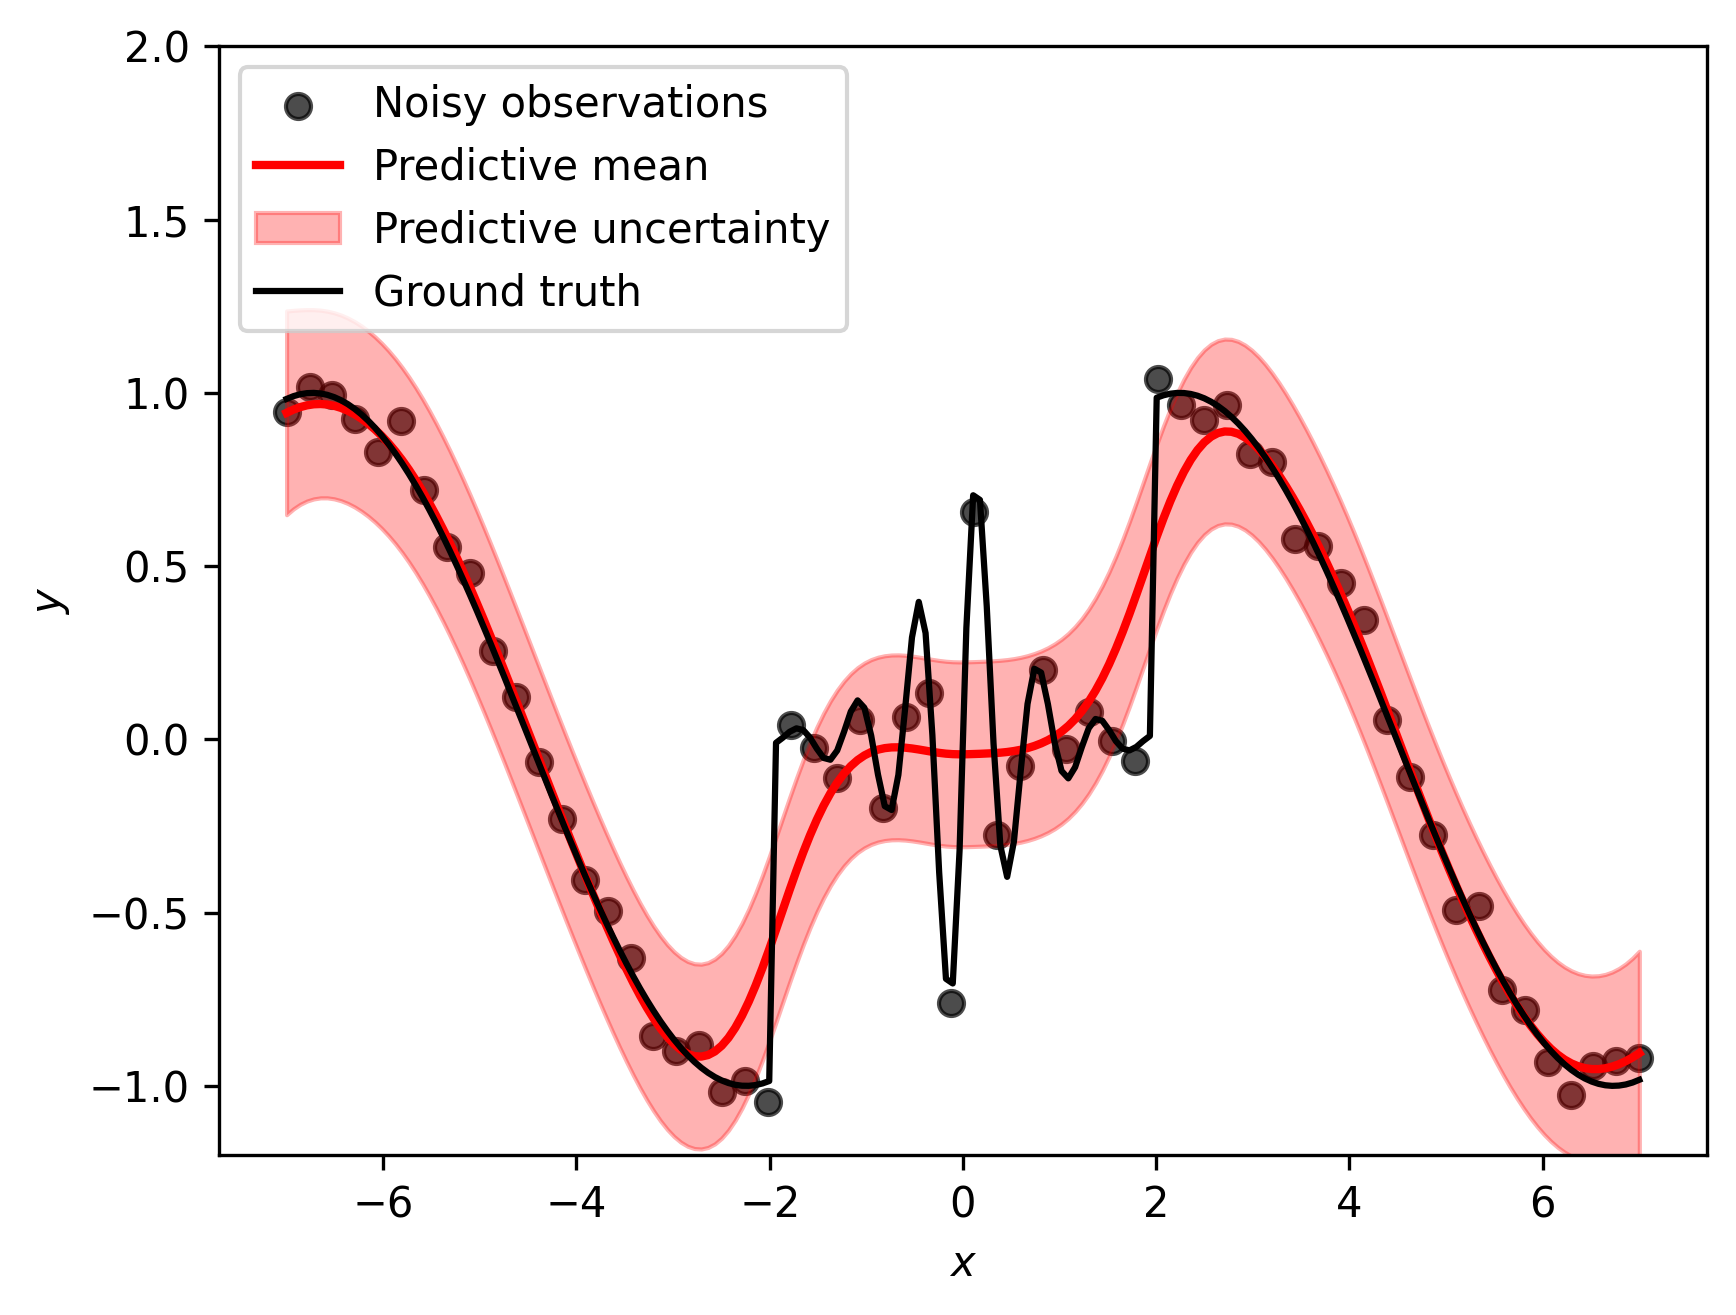

In [6]:
_, ax = plt.subplots(dpi=300)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.scatter(X, y, c='k', label="Noisy observations", alpha=0.7)
ax.plot(X_test, posterior_mean, lw=2.0,  c='r', label='Predictive mean')
ax.fill_between(X_test,
                posterior_mean - np.sqrt(posterior_var),
                posterior_mean + np.sqrt(posterior_var),
                color='r', alpha=0.3, label="Predictive uncertainty")
ax.plot(X_test, y_test, c='k', label='Ground truth')
ax.set_ylim(-1.2, 2.0)
ax.legend(loc='upper left')

### DKL

In [7]:
# Initialize DKL model with 2 latent dimensions
model = DKL(1, 2, RBFKernel)
# Train
model.fit(X, y, num_warmup=2000, num_samples=2000)
# Make prediciton on full/test data
posterior_mean, posterior_var = model.predict(X_test, noiseless=False)

sample: 100%|██████████| 4000/4000 [25:50<00:00,  2.58it/s, 1023 steps of size 8.58e-04. acc. prob=0.88]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.47      3.70      0.66      0.13      1.89     95.20      1.02
k_length[1]      3.42      3.94      2.08      0.20      8.54     23.91      1.00
    k_scale      0.67      0.49      0.53      0.15      1.21    103.34      1.00
      noise      0.01      0.00      0.01      0.00      0.01     83.51      1.00



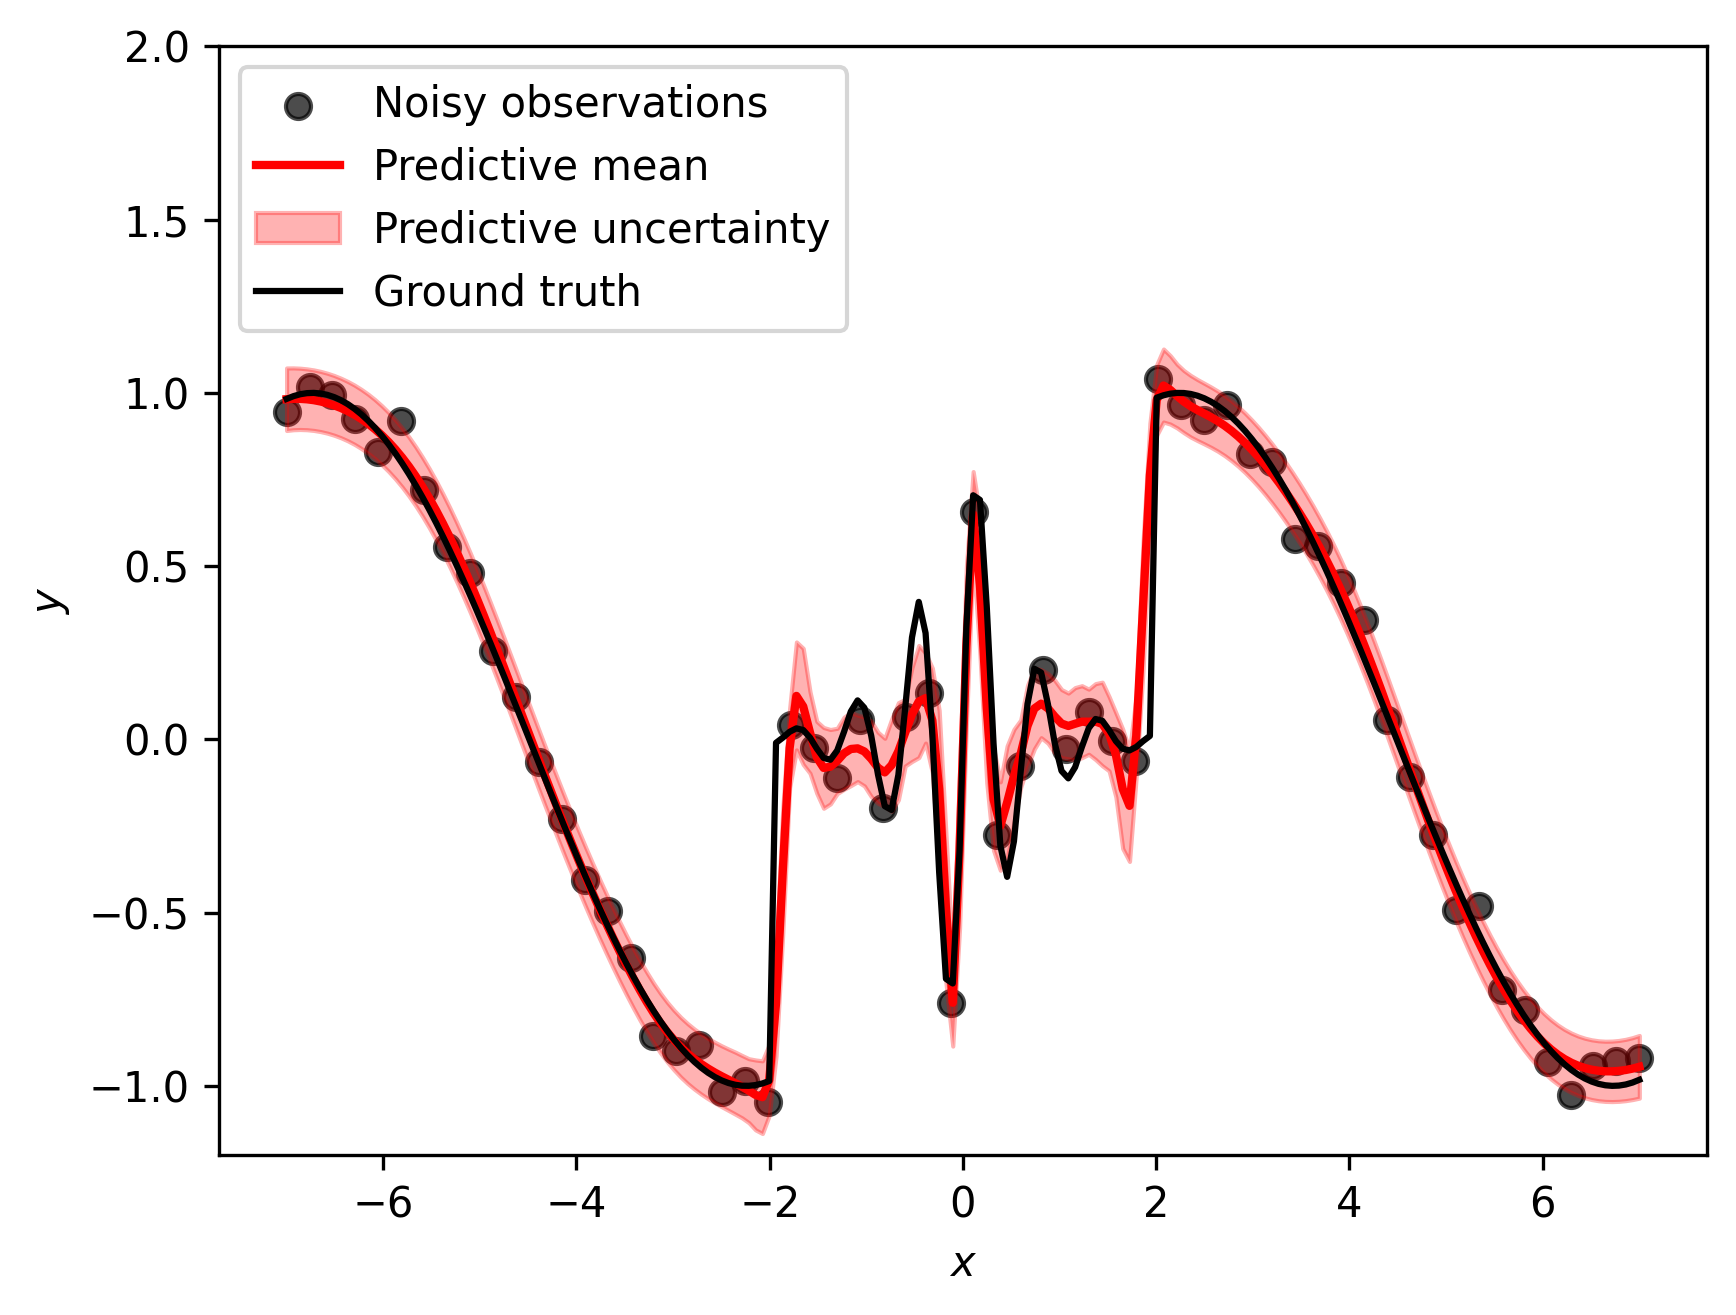

In [8]:
_, ax = plt.subplots(dpi=300)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.scatter(X, y, c='k', label="Noisy observations", alpha=0.7)
ax.plot(X_test, posterior_mean, lw=2.0,  c='r', label='Predictive mean')
ax.fill_between(X_test,
                posterior_mean - np.sqrt(posterior_var),
                posterior_mean + np.sqrt(posterior_var),
                color='r', alpha=0.3, label="Predictive uncertainty")
ax.plot(X_test, y_test, c='k', label='Ground truth')
ax.set_ylim(-1.2, 2.0)
ax.legend(loc='upper left')

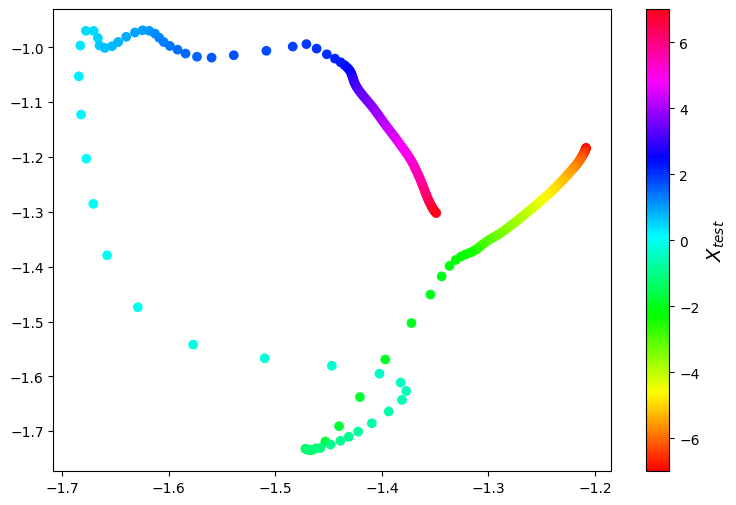

In [9]:
# Embed input data into the latent space of the trained DKL model
z_samples = model.embed(X_test[:, None])
# Avarage over the HMC samples
z_mean = z_samples.mean(0)

# Plot the embedding
plt.figure(figsize=(9, 6))
plt.scatter(z_mean[:, 1], z_mean[:, 0], c=X_test, cmap='hsv')
cbar = plt.colorbar()
cbar.set_label('$X_{test}$', fontsize=14)

### Non-stationary 3

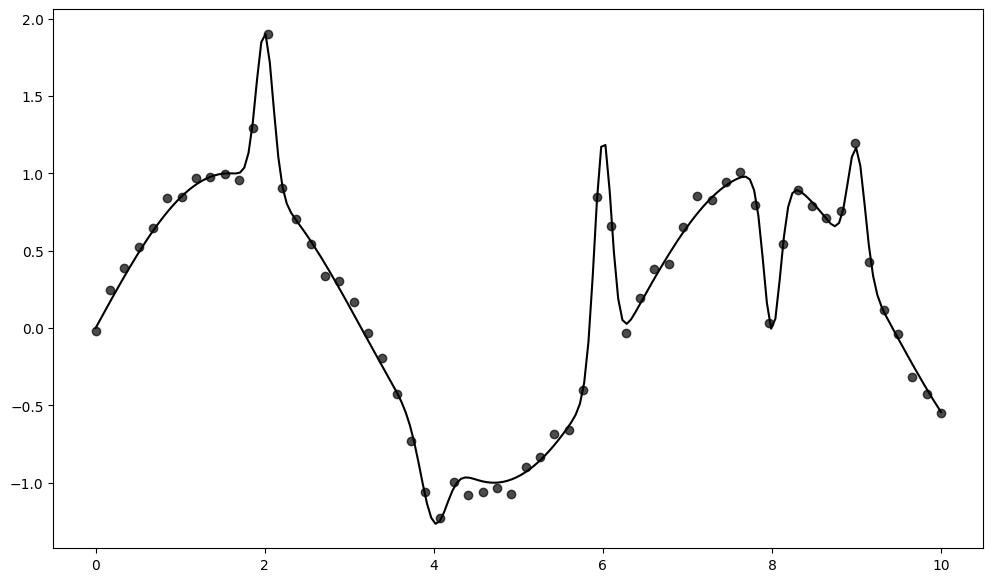

In [10]:
# Generate synthetic data
X, X_test, y, y_test = utils.nonstationary3(num_points=60, random_seed=None)

# Add small observational noise
y = np.random.normal(y, scale=0.05)

# Plot
plt.figure(figsize=(12, 7))
plt.scatter(X, y, c='k', alpha=0.7)
plt.plot(X_test, y_test, c='k')

### GP

In [11]:
# Initialize standard GP model
model = GP(1, MaternKernel)
# Train
model.fit(X, y, num_warmup=2000, num_samples=2000)
# Make a prediction on full/test inputs
posterior_mean, posterior_var = model.predict(X_test, noiseless=False)

sample: 100%|██████████| 4000/4000 [00:36<00:00, 109.46it/s, 3 steps of size 4.62e-01. acc. prob=0.94] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      1.17      0.47      1.06      0.48      1.85    818.38      1.00
    k_scale      0.81      0.57      0.66      0.22      1.41    797.54      1.00
      noise      0.07      0.02      0.06      0.03      0.10   1022.01      1.00



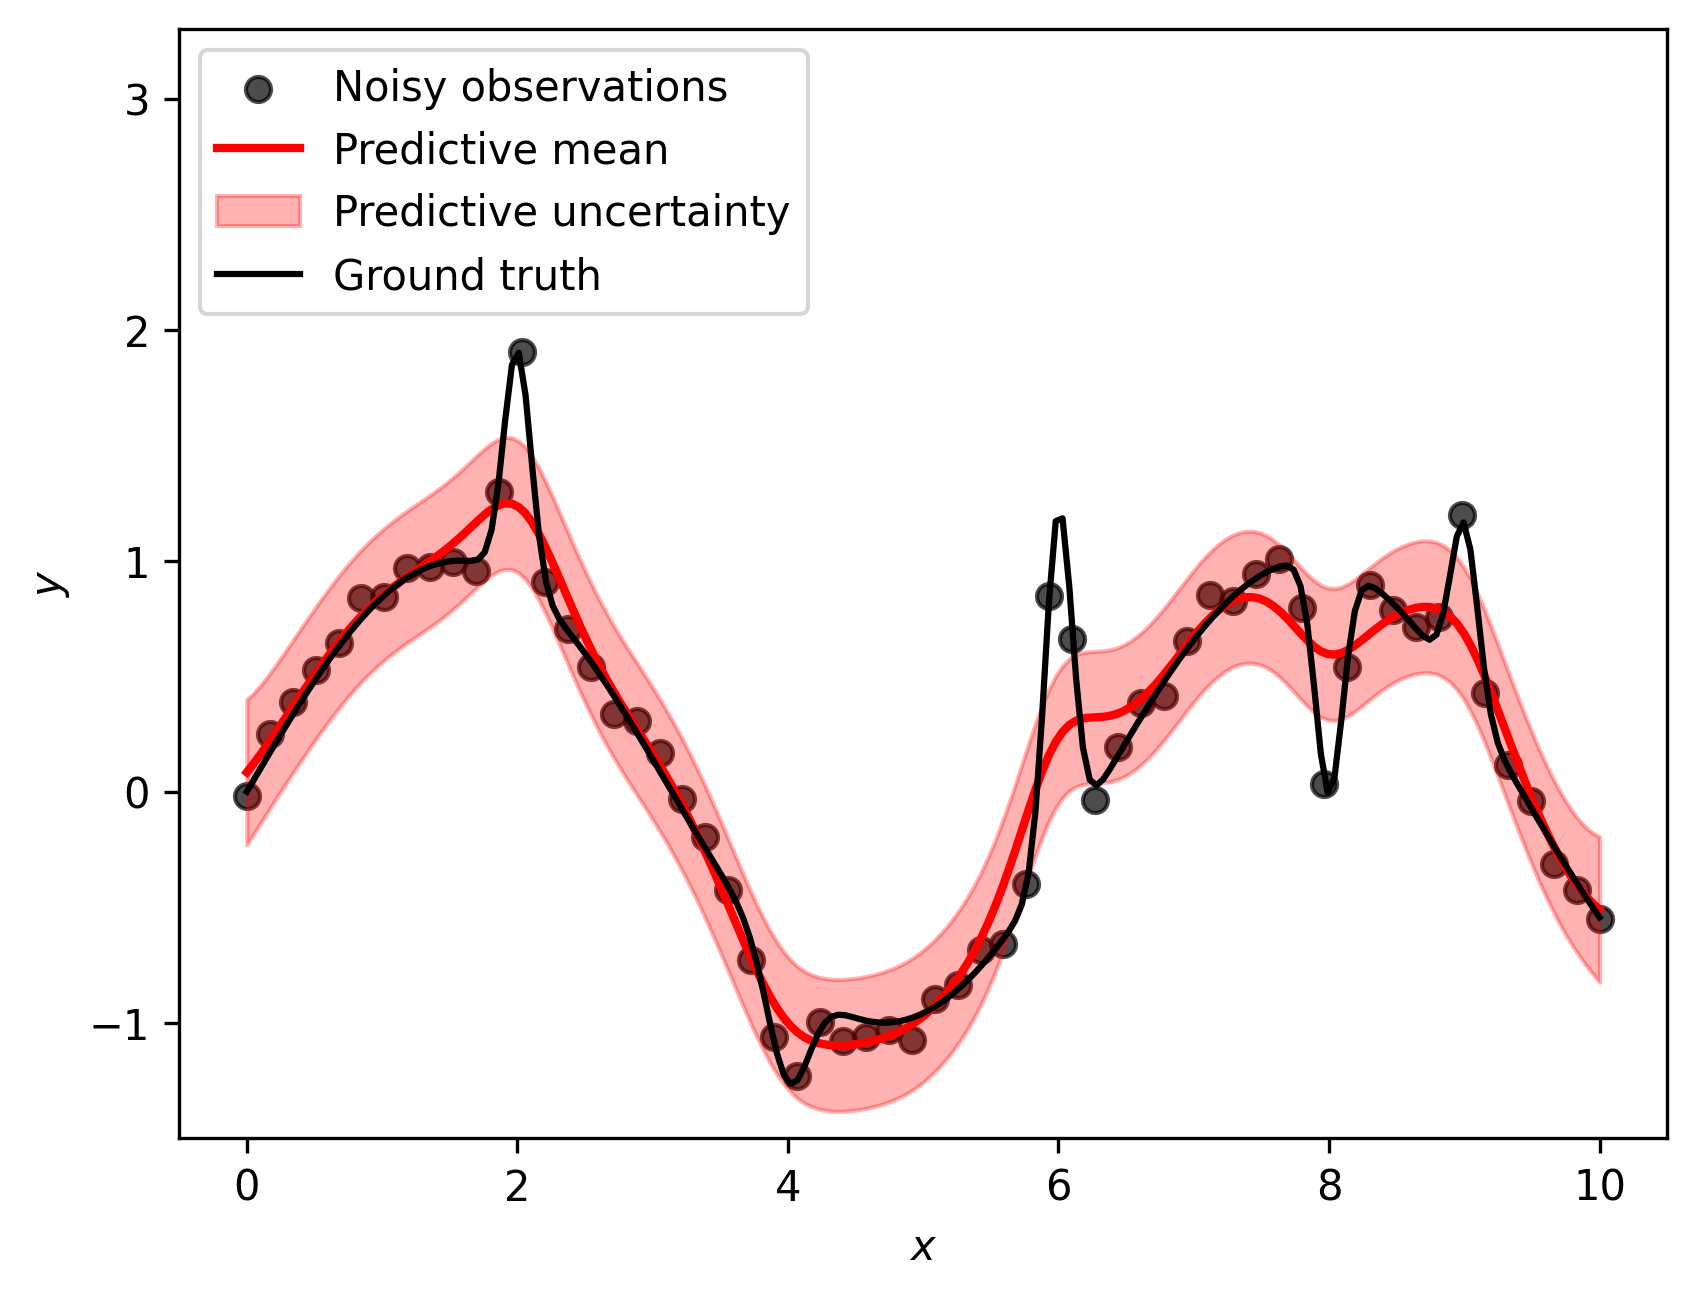

In [15]:
_, ax = plt.subplots(dpi=300)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.scatter(X, y, c='k', label="Noisy observations", alpha=0.7)
ax.plot(X_test, posterior_mean, lw=2.0,  c='r', label='Predictive mean')
ax.fill_between(X_test,
                posterior_mean - np.sqrt(posterior_var),
                posterior_mean + np.sqrt(posterior_var),
                color='r', alpha=0.3, label="Predictive uncertainty")
ax.plot(X_test, y_test, c='k', label='Ground truth')
ax.set_ylim(-1.5, 3.3)
ax.legend(loc='upper left')

### DKL

In [16]:
# Initialize DKL model with 2 latent dimensions
model = DKL(1, 2, RBFKernel)
# Train
model.fit(X, y, num_warmup=2000, num_samples=2000)
# Make prediciton on full/test data
posterior_mean, posterior_var = model.predict(X_test, noiseless=False)

sample: 100%|██████████| 4000/4000 [26:24<00:00,  2.52it/s, 1023 steps of size 7.01e-04. acc. prob=0.89]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      0.80      0.71      0.59      0.13      1.54     67.44      1.01
k_length[1]      1.06      0.93      0.81      0.22      1.99     40.38      1.00
    k_scale      0.99      0.64      0.79      0.26      1.83     45.17      1.00
      noise      0.01      0.01      0.01      0.00      0.02     56.62      1.00



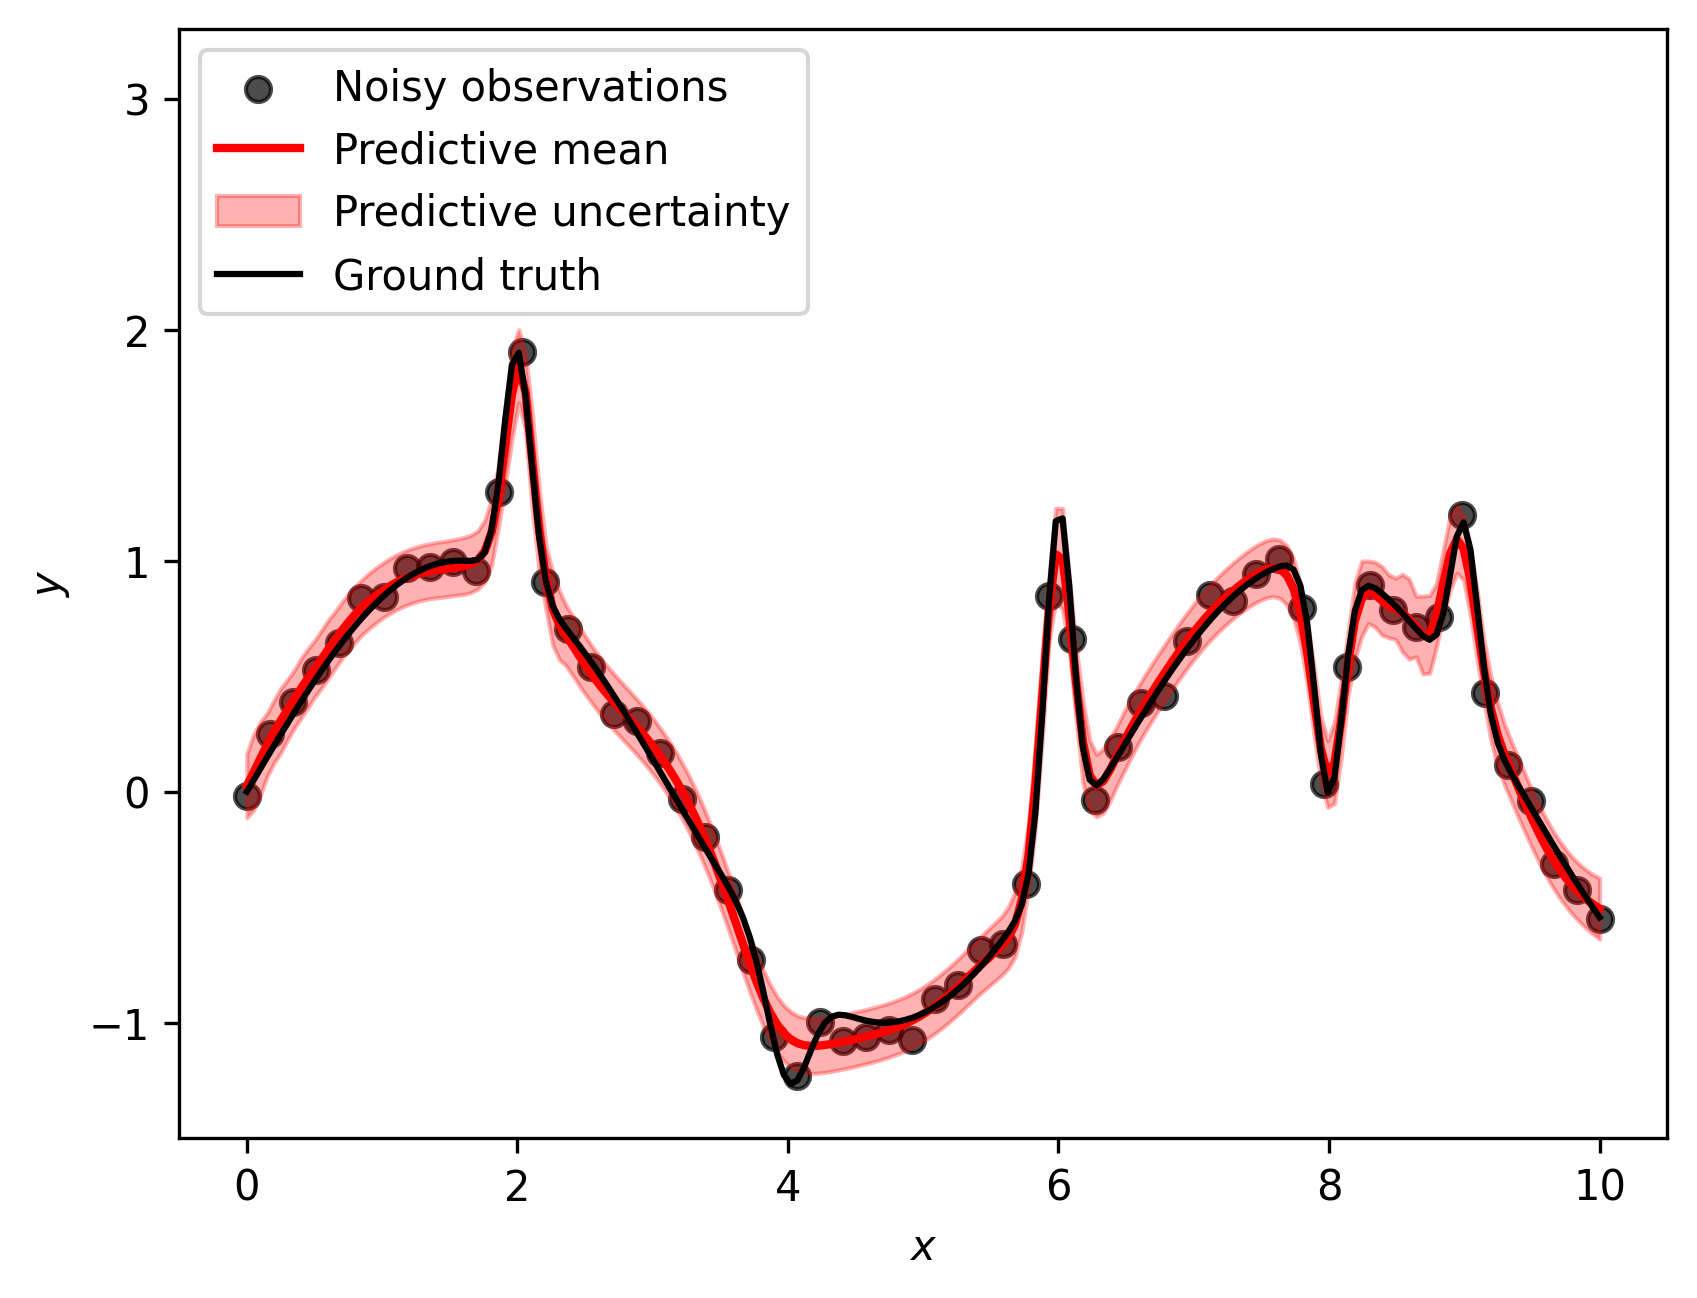

In [19]:
_, ax = plt.subplots(dpi=300)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.scatter(X, y, c='k', label="Noisy observations", alpha=0.7)
ax.plot(X_test, posterior_mean, lw=2.0,  c='r', label='Predictive mean')
ax.fill_between(X_test,
                posterior_mean - np.sqrt(posterior_var),
                posterior_mean + np.sqrt(posterior_var),
                color='r', alpha=0.3, label="Predictive uncertainty")
ax.plot(X_test, y_test, c='k', label='Ground truth')
ax.set_ylim(-1.5, 3.3)
ax.legend(loc='upper left')

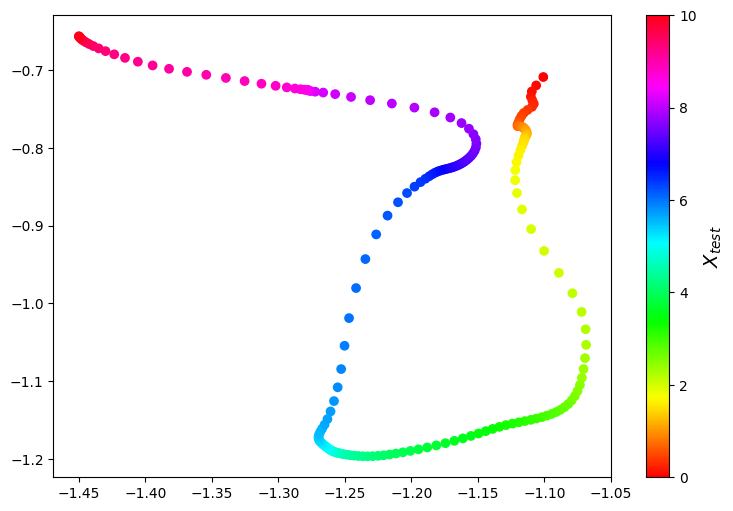

In [20]:
# Embed input data into the latent space of the trained DKL model
z_samples = model.embed(X_test[:, None])
# Avarage over the HMC samples
z_mean = z_samples.mean(0)

# Plot the embedding
plt.figure(figsize=(9, 6))
plt.scatter(z_mean[:, 1], z_mean[:, 0], c=X_test, cmap='hsv')
cbar = plt.colorbar()
cbar.set_label('$X_{test}$', fontsize=14)